**                            PROYECTO POBLACION DE AGUSCALIENTES                                 **

Proyecto de análisis de datos sobre la población total de México y de Aguascalientes, utilizando la Metodología de Análisis de Datos de Google. 📈

La metodología de Google sigue seis pasos principales:

*Preguntar (Ask)
*Preparar (Prepare)
*Procesar (Process)
*Analizar (Analyze)
*Compartir (Share)
*Actuar (Act)

1.- Pregunatar 
En esta fase, se define el problema y se establecen las metas.

Objetivo de negocio: Comprender la distribución y las tendencias de la población en México, enfocándose en Aguascalientes y sus municipios.

Preguntas clave a responder:

¿Cuál es la población total de Aguascalientes?

¿Cómo se distribuye la población entre los municipios de Aguascalientes?

¿Cuál es el municipio más y menos poblado?

¿Cual es la distribucion de poblacion por genero ?

Métricas a medir: Población total (absoluta), porcentajes de distribución municipal y estatal.

2.- Preparar
- Fuente de datos: Tu archivo CSV (fuente oficiale del INEGI).

- Tipo de datos: Cuantitativos (números de población) y cualitativos (nombres de estados y municipios).

Organización:

Asegúrate de que el CSV tenga columnas claras como: Entidad Federativa, Municipio, y Población Total.

Si tienes datos de diferentes años, asegúrate de tener una columna de Año.

Herramientas: Hojas de cálculo (Excel) o lenguajes de programación como Python jupyther (con librerías como Pandas) ,VS code

3.- Procesar 
Aquí se limpian y transforman los datos para que sean aptos para el análisis.

Limpieza de datos (Data Cleaning):

- Identificación de errores: Buscar valores faltantes (NaN,    celdas  vacías), valores atípicos (poblaciones que parecen ser errores de entrada).

* Consistencia: Estandarizar los nombres de las entidades y municipios (ej. evitar "AgS" y usar solo "Aguascalientes").
* Formato: Asegurar que la columna de Población Total esté en formato numérico (sin comas ni puntos de miles que Python o R puedan interpretar mal).

- Transformación de datos:

* Crear subconjuntos de datos: Filtrar solo los datos de Aguascalientes para el análisis municipal detallado.

* Agregar nuevas columnas si es necesario (ej. una columna de porcentaje de la población estatal por municipio).

In [1]:
# 1.- importar librerias y carga de datos 
import pandas as pd 
import numpy 
import matplotlib 

In [2]:
# carga de datos 
df_data = pd.read_csv("DATA/copy_data.csv")

In [3]:
# visualizar las primeras 5 filas 
print(" * viasuliza las primeras 5 filas *")
df_data.head()

 * viasuliza las primeras 5 filas *


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
1,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*
2,1,Aguascalientes,0,Total de la entidad Aguascalientes,9999,Localidades de dos viviendas,NaN,NaN,NaN,3021,...,470,146,156,35,38,25,44,330,11,*
3,1,Aguascalientes,1,Aguascalientes,0,Total del Municipio,NaN,NaN,NaN,948990,...,251719,178619,130290,80951,56131,3299,7293,74227,731,*
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",1878.0,863893,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13


In [4]:

# funcion info para el tipo de datos 
print(" * informacion de columnas y tipos de dato *")
df_data.info()

 * informacion de columnas y tipos de dato *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Columns: 286 entries, ENTIDAD to TAMLOC
dtypes: float64(1), int64(6), object(279)
memory usage: 4.5+ MB


Limpieza y filtrado inicial 

que columnas necesitamospara este analisis de filtrado 
MUN = id de municipio 001 a aguscalientes 000 total municipio
POBTOT = poblacion total
POBFEM = poblacion femenina
POBMAS = poblacion masculina
NOM_LOC = nombre de la localidad 
NOM_MUN = nombre de muicipio
ENTIDAD = 1 que es ags  Y POBTOT

In [5]:
# PASO 1: Filtrar solo la Entidad de Aguascalientes (Código de Entidad = 1)
df_ags =df_data[df_data["ENTIDAD"]== 1 ].copy() #usamos copy para evitar advertencias

In [6]:
# PASO 2: Identificar las filas que representan los totales municipales
# Las filas con MUN == 0 son los totales estatales (no es aplicable aquí porque ya filtramos)
# Las filas con LOC == 0 son los TOTALES MUNICIPALES (que incluyen todas sus localidades)
df_municipios = df_ags[df_ags["LOC"] ==0].copy()




In [7]:
# paso 3 seleccionar columnas necesarias 
df_analisis = df_municipios[["ENTIDAD","NOM_ENT", "MUN", "NOM_MUN", "POBTOT","POBFEM","POBMAS"]]

In [8]:
print("\n Municipios  de Aguascalientes y su poblacion total ")
print(df_analisis)


 Municipios  de Aguascalientes y su poblacion total 
      ENTIDAD         NOM_ENT  MUN                             NOM_MUN  \
0           1  Aguascalientes    0  Total de la entidad Aguascalientes   
3           1  Aguascalientes    1                      Aguascalientes   
571         1  Aguascalientes    2                            Asientos   
746         1  Aguascalientes    3                            Calvillo   
915         1  Aguascalientes    4                               Cosío   
982         1  Aguascalientes    5                         Jesús María   
1200        1  Aguascalientes    6                 Pabellón de Arteaga   
1394        1  Aguascalientes    7                     Rincón de Romos   
1651        1  Aguascalientes    8                  San José de Gracia   
1686        1  Aguascalientes    9                            Tepezalá   
1790        1  Aguascalientes   10                            El Llano   
1960        1  Aguascalientes   11           San Francisco

4.- Analizar 
Esta es la etapa donde se explotan los datos para responder a las preguntas iniciales.

- Cálculos principales:

* Suma total: Población total de México y de Aguascalientes.

* Distribución: Calcular el porcentaje de la población de Aguascalientes con respecto a la población nacional.

* Ranking: Ordenar los municipios de Aguascalientes de mayor a menor población.

- Análisis comparativo: Comparar la población del municipio de Aguascalientes (capital) con el resto de los municipios.

- Análisis de tendencias (si tienes datos históricos): Calcular la tasa de crecimiento poblacional anual o intercensal para ver qué municipios crecen más rápido.

ANALISIS DESCRIPTIVO 

In [44]:
# Cálculo 1: Población Total de Aguascalientes ()
poblacion_ags_total = df_data.loc[df_data['NOM_LOC'] == 'Total de la Entidad', 'POBTOT'].values[0]
print(f"Población total de Aguascalientes : {poblacion_ags_total}")

Población total de Aguascalientes : 1425607


In [45]:
# Cálculo 1: Población Total de Aguascalientes ()
poblacion_ags_total_col = df_analisis["POBTOT"]
print("Poblacion total de Aguscalientes ",poblacion_ags_total_col)

Poblacion total de Aguscalientes  0       1425607
3        948990
571       51536
746       58250
915       17000
982      129929
1200      47646
1394      57369
1651       9552
1686      22485
1790      20853
1960      61997
Name: POBTOT, dtype: int64


In [46]:
# filtrado para la poblacion entre mujeres y hombres 
poblacion_ags_mujeres = df_data.loc[df_data['NOM_LOC'] == 'Total de la Entidad', 'POBFEM'].values[0]
print(f"Población total de mujeres  de Aguascalientes : {poblacion_ags_mujeres}")

poblacion_ags_hombres = df_data.loc[df_data['NOM_LOC'] == 'Total de la Entidad', 'POBMAS'].values[0]
print(f"Población total de hombres de Aguascalientes : {poblacion_ags_hombres}")

Población total de mujeres  de Aguascalientes : 728924
Población total de hombres de Aguascalientes : 696683


In [47]:
# porcentaje de la poblacion por genero 
#verificar tipo de dato para poder dividir 
print(f"Tipo de poblacion_ags_mujeres: {type(poblacion_ags_mujeres)}")
print(f"Tipo de poblacion_ags_total: {type(poblacion_ags_total)}")
print(f"Tipo de poblacion_ags_hombres: {type(poblacion_ags_hombres)}")

# cambiar tipo de dato 
poblacion_ags_mujeres = float(poblacion_ags_mujeres)
poblacion_ags_total   = float(poblacion_ags_total)
poblacion_ags_hombres = float(poblacion_ags_hombres)

# calculando porcentaje en Mujeres 
porcentaje_ags_mujeres = (poblacion_ags_mujeres / poblacion_ags_total) * 100
print(f"Porcentaje de Mujeres en AGS: {porcentaje_ags_mujeres:.2f}%", poblacion_ags_mujeres)

# calculando porcentaje en Hombres
porcentaje_ags_hombres = (poblacion_ags_hombres / poblacion_ags_total) * 100
print(f"Porcentaje de Hombres en AGS: {porcentaje_ags_hombres:.2f}%", poblacion_ags_hombres)

Tipo de poblacion_ags_mujeres: <class 'str'>
Tipo de poblacion_ags_total: <class 'numpy.int64'>
Tipo de poblacion_ags_hombres: <class 'str'>
Porcentaje de Mujeres en AGS: 51.13% 728924.0
Porcentaje de Hombres en AGS: 48.87% 696683.0


In [27]:
# Cálculo 3: Ordenar para identificar los más/menos poblados
df_analisis_ordenado = df_analisis.sort_values(by = "POBTOT",ascending = False)
print("\n--- Análisis Ordenado de Población Municipal (%) ---")
print(df_analisis_ordenado)


--- Análisis Ordenado de Población Municipal (%) ---
      ENTIDAD         NOM_ENT  MUN                             NOM_MUN  \
0           1  Aguascalientes    0  Total de la entidad Aguascalientes   
3           1  Aguascalientes    1                      Aguascalientes   
982         1  Aguascalientes    5                         Jesús María   
1960        1  Aguascalientes   11           San Francisco de los Romo   
746         1  Aguascalientes    3                            Calvillo   
1394        1  Aguascalientes    7                     Rincón de Romos   
571         1  Aguascalientes    2                            Asientos   
1200        1  Aguascalientes    6                 Pabellón de Arteaga   
1686        1  Aguascalientes    9                            Tepezalá   
1790        1  Aguascalientes   10                            El Llano   
915         1  Aguascalientes    4                               Cosío   
1651        1  Aguascalientes    8                  San Jo

In [50]:
# Identificar el municipio más y menos poblado
municipio_mas_poblado = df_analisis_ordenado.iloc[0]["NOM_MUN"]
municipio_menos_poblado = df_analisis_ordenado.iloc[-1]["NOM_MUN"]

print("\n El municipio mas poblado es : ",municipio_mas_poblado)
print("\n El municipio menos poblado es: ", municipio_menos_poblado)


 El municipio mas poblado es :  Total de la entidad Aguascalientes

 El municipio menos poblado es:  San José de Gracia


5.- Compartir 
Se presentan los hallazgos de manera clara y visual.

- Visualizaciones:

* Gráfico de barras: Población total por municipio de Aguascalientes.

* Gráfico de pastel o Anillo (Donut Chart): Distribución porcentual de la población municipal de Aguascalientes.

* Mapas (si la herramienta lo permite): Un mapa de calor (coropletas) de Aguascalientes mostrando la densidad o la población en cada municipio.

- Narrativa: Presenta la historia de tus datos: "Aguascalientes representa el X% de la población nacional, y dentro del estado, el municipio capital concentra el Y% de los habitantes."


In [64]:
# Crear un DataFrame simple para el gráfico de pastel
data_barras = pd.DataFrame({
    'Sexo': ['Mujeres', 'Hombres'],
    'Poblacion': [poblacion_ags_mujeres, poblacion_ags_hombres]
})
print(data_barras)

      Sexo  Poblacion
0  Mujeres   728924.0
1  Hombres   696683.0


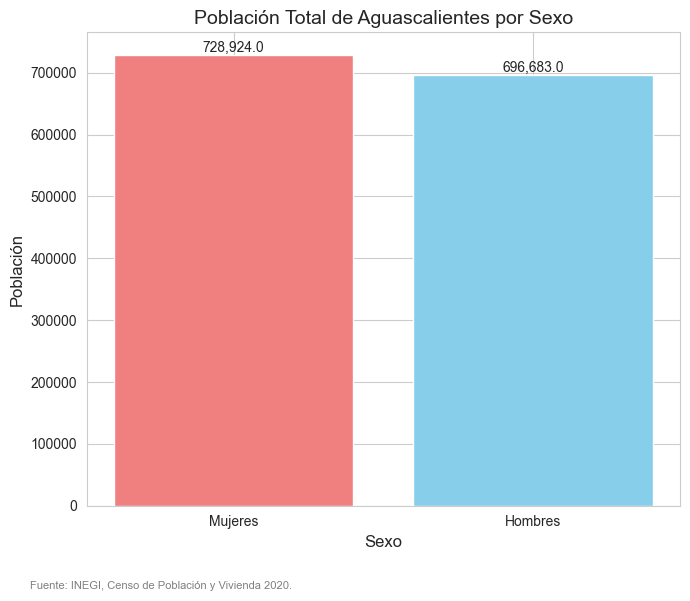

In [68]:
import matplotlib.pyplot as plt
import pandas as pd # Necesario si quieres usar DataFrame para el gráfico, aunque Matplotlib puede usar listas directamente

# --- 1. Crear el DataFrame para el Gráfico ---
# Organizamos los datos en un DataFrame de Pandas para un manejo más limpio
data_sexo_estatal = pd.DataFrame({
    'Sexo': ['Mujeres', 'Hombres'],
    'Poblacion': [poblacion_ags_mujeres, poblacion_ags_hombres]
})

# --- 2. Crear la Visualización ---
plt.figure(figsize=(7, 6))

# Crear el gráfico de barras
# x: Categoría (Sexo), y: Valor (Poblacion)
plt.bar(
    data_sexo_estatal['Sexo'],
    data_sexo_estatal['Poblacion'],
    color=['lightcoral', 'skyblue']
)

# Personalizar el gráfico
plt.title('Población Total de Aguascalientes por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Población', fontsize=12)

# Formatear el eje Y para evitar notación científica y hacerlo legible
plt.ticklabel_format(style='plain', axis='y')

# Mostrar los valores exactos en la parte superior de cada barra (opcional pero muy útil)
for i in range(len(data_sexo_estatal)):
    plt.text(
        i, # Posición X (índice de la barra)
        data_sexo_estatal['Poblacion'][i] + 5000, # Posición Y (un poco arriba de la barra)
        f"{data_sexo_estatal['Poblacion'][i]:,}", # Texto formateado con comas
        ha='center',
        fontsize=10
    )

# ➡️ Añadir la Referencia de la Fuente (en la parte inferior)
referencia_texto = "Fuente: INEGI, Censo de Población y Vivienda 2020."
plt.figtext(
    0.05,
    0.01,
    referencia_texto,
    ha='left',
    fontsize=8,
    color='gray'
)

plt.tight_layout(rect=[0, 0.05, 1, 1]) # Ajusta el espacio
plt.show()

In [54]:

# Crear un DataFrame simple para el gráfico de pastel
data_pastel = pd.DataFrame({
    'Sexo': ['Mujeres', 'Hombres'],
    'Poblacion': [poblacion_ags_mujeres, poblacion_ags_hombres]
})
print(data_pastel)

      Sexo  Poblacion
0  Mujeres   728924.0
1  Hombres   696683.0


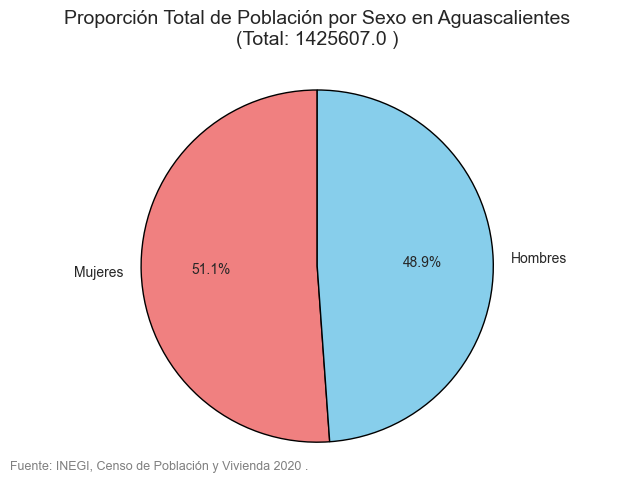

In [57]:
# configurar la figura para el grafico de pastel 
plt.Figure(figsize=(8,8))

# etiqueteas para la leyenda y el porcentaje 
labels = data_pastel["Sexo"]
sizes = data_pastel["Poblacion"]
colors  = ["lightcoral", "skyblue"]

# crear grafico pastel 
plt.pie(
    sizes,
    labels =labels,
    colors= colors,
    # autopct formatea el texto del porcentaje (1.1f%%)
    autopct = "%1.1f%%",
    startangle = 90,
    wedgeprops={"edgecolor": "black"} #añadir un borde a las rebanadas 
    )
# titulo y centrado del gradfico 
plt.title(
    f'Proporción Total de Población por Sexo en Aguascalientes\n(Total: {poblacion_ags_total} )',
    fontsize= 14,
    pad = 20
)
# ➡️ Añadir la Referencia de la Fuente con plt.figtext()
referencia_texto = "Fuente: INEGI, Censo de Población y Vivienda 2020 ."

# plt.figtext(x, y, texto, **kwargs)
# x=0.05 es cerca del borde izquierdo. y=0.01 es cerca del borde inferior.
plt.figtext(
    0.02, # Posición X (cerca del borde izquierdo)
    0.01, # Posición Y (cerca del borde inferior)
    referencia_texto,
    ha='left',
    fontsize=9,
    color='gray'
)
# asegura que el pastel sea un circulo
plt.axis("equal")
plt.tight_layout()
plt.show()


6.- Actuar 
Se utiliza el análisis para tomar decisiones o hacer recomendaciones.

- Recomendaciones/Conclusiones: ¿Qué implican estos números?

* Si un municipio es pequeño, ¿necesita más inversión en infraestructura para evitar la migración?

* Si el municipio capital está muy concentrado, ¿se necesitan políticas de desarrollo urbano para el crecimiento ordenado?

- Ejemplo de acción: Un gobierno municipal podría usar el dato del rápido crecimiento poblacional en cierto municipio para planificar la construcción de nuevas escuelas o centros de salud.
